# Hotel Booking Demand

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat

# Loading dataset via URL

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/huantnguyen/Hotel-Booking-Demands-Dataset/main/hotel_bookings.csv')

# Viewing first 5 and last 5 rows

In [3]:
pd.set_option('precision', 2)

data.head() 

In [4]:
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


#### Checking if there exist Nan values

In [5]:
data.isnull().values.any()

True

In [6]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

#### Checking columns datatype

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Flling in null values

In [8]:
# Since agent and children are both floats, we will fill in null values with median value
all_agent = data.agent
agent_median = stat.median(all_agent)
print(f'stat.median    = {stat.median(all_agent):.2f}')
data[['agent']] = data[['agent']].fillna(value = agent_median)

all_children = data.children
children_median = stat.median(all_children)
print(f'stat.median    = {stat.median(all_children):.2f}')
data[['children']] = data[['children']].fillna(value = children_median)

# Check if it worked
data[['agent', 'children', 'company']].isnull().sum()

stat.median    = 240.00
stat.median    = 0.00


agent            0
children         0
company     112593
dtype: int64

In [9]:
# Since country is string, we will fill in null values with None for simplicity
data[['country']] = data[['country']].fillna(value='None')
# Check if it worked
data[['country']].isnull().sum()

country    0
dtype: int64

In [10]:
data.isnull().values.any()

True

# Simple Analysis

In [11]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.0,1.19e+05,119390.00,119390.00,119390.00,119390.00,119390.00,6797.00,119390.00,119390.00,119390.00,119390.00
mean,0.37,104.01,2016.16,27.17,15.80,0.93,2.50,1.86,0.1,7.95e-03,0.03,0.09,0.14,0.22,107.68,189.27,2.32,101.83,0.06,0.57
std,0.48,106.86,0.71,13.61,8.78,1.00,1.91,0.58,0.4,9.74e-02,0.18,0.84,1.50,0.65,115.62,131.66,17.59,50.54,0.25,0.79
min,0.00,0.00,2015.00,1.00,1.00,0.00,0.00,0.00,0.0,0.00e+00,0.00,0.00,0.00,0.00,1.00,6.00,0.00,-6.38,0.00,0.00
25%,0.00,18.00,2016.00,16.00,8.00,0.00,1.00,2.00,0.0,0.00e+00,0.00,0.00,0.00,0.00,9.00,62.00,0.00,69.29,0.00,0.00
50%,0.00,69.00,2016.00,28.00,16.00,1.00,2.00,2.00,0.0,0.00e+00,0.00,0.00,0.00,0.00,28.00,179.00,0.00,94.58,0.00,0.00
75%,1.00,160.00,2017.00,38.00,23.00,2.00,3.00,2.00,0.0,0.00e+00,0.00,0.00,0.00,0.00,240.00,270.00,0.00,126.00,0.00,1.00
max,1.00,737.00,2017.00,53.00,31.00,19.00,50.00,55.00,10.0,1.00e+01,1.00,26.00,72.00,21.00,535.00,543.00,391.00,5400.00,8.00,5.00


In [12]:
month_val = data["arrival_date_month"].value_counts()
month_name = data["arrival_date_month"].value_counts().index.tolist()
month_name

['August',
 'July',
 'May',
 'October',
 'April',
 'June',
 'September',
 'March',
 'February',
 'November',
 'December',
 'January']

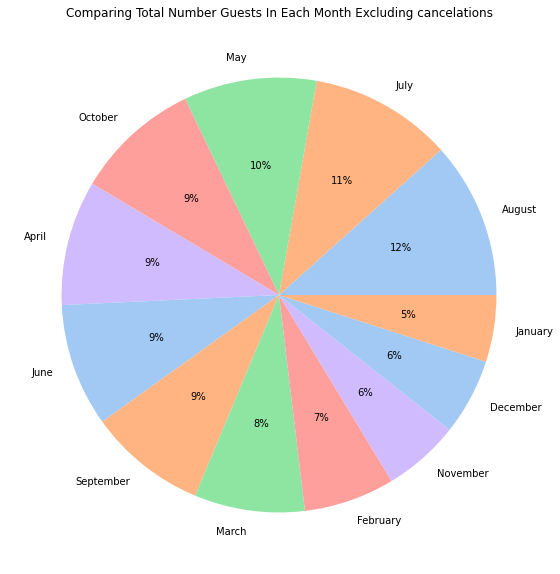

In [20]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.figure(figsize=(10,10))
plt.title('Comparing Total Number Guests In Each Month Excluding cancelations')
plt.pie(month_val, labels = month_name, colors = colors, autopct='%.0f%%')
plt.show()

### So we can see that August is the most popular month for hotel booking and January is the least popular.

In [14]:
data.groupby(['arrival_date_month','arrival_date_year'])

Text(1.3436237373737328, 0.5, 'Num of Guests')

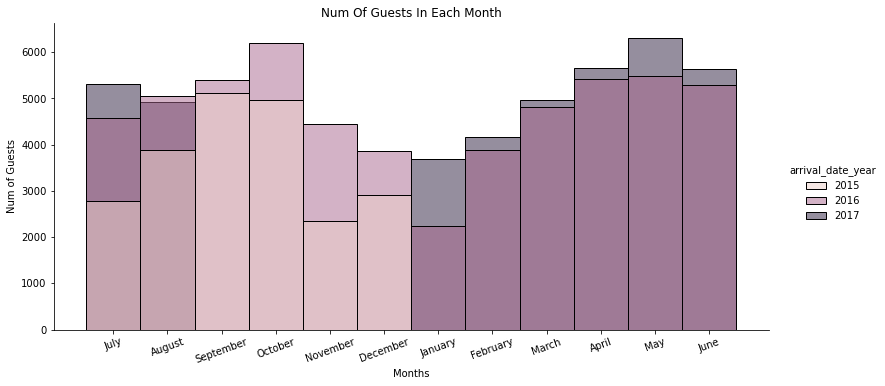

In [15]:
sns.displot(data=data,x='arrival_date_month',hue='arrival_date_year', height=5, aspect=11/5)
plt.title('Num Of Guests In Each Month')
plt.xticks(rotation=20) #No overlapping
plt.xlabel('Months')
plt.ylabel('Num of Guests')

### The month where most customers book hotel changes by the year as well. We can see that in 2015, September is the busiest month. In 2016, October is the busiest month. Finally, in 2017, May is the busiest month. However we can kind of see that around summer time, a lot of tourists will likely to book hotels.

## How much tourists pay for hotels?

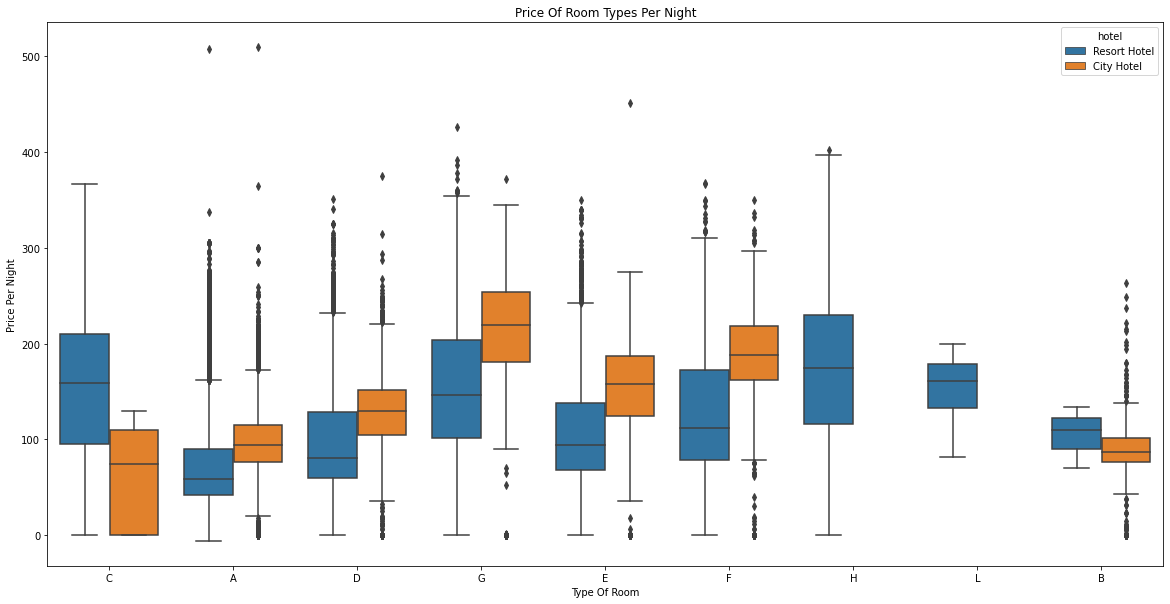

In [16]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data[data['is_canceled'] == 0],x='reserved_room_type',y='adr',hue='hotel')
plt.title('Price Of Room Types Per Night')
plt.xlabel('Type Of Room')
plt.ylabel('Price Per Night')
plt.show()

# Add histogram for country

Text(0, 0.5, 'Number')

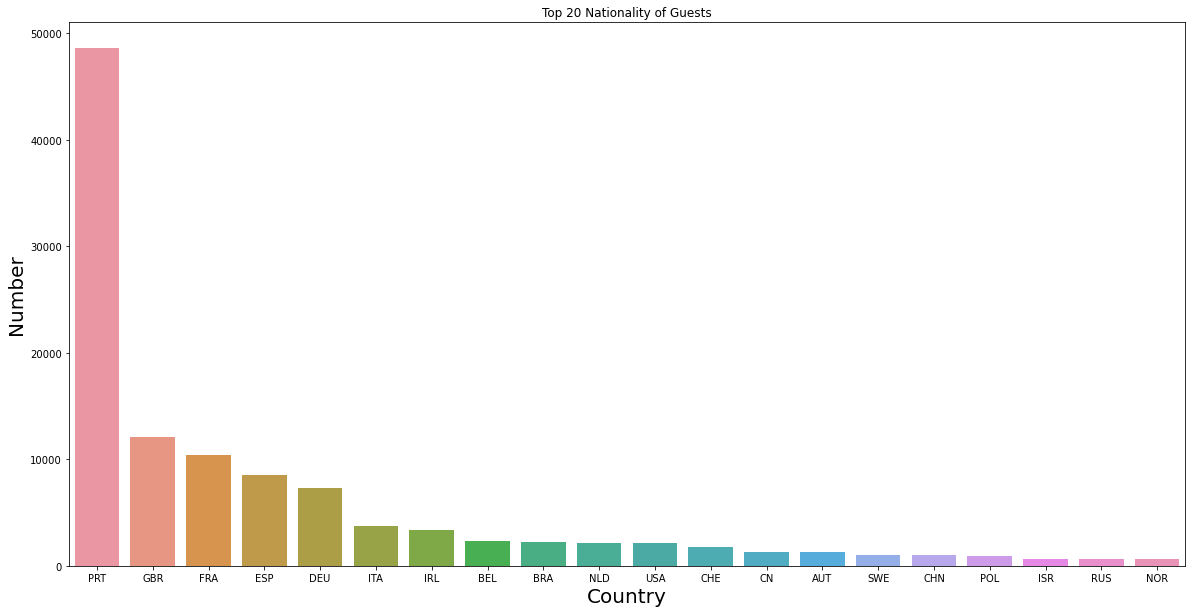

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(x='country', data=data, order=pd.value_counts(data['country']).iloc[:20].index)
plt.title('Top 20 Nationality of Guests')
plt.xlabel('Country', fontsize=20)
plt.ylabel('Number', fontsize=20)